In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Data preprocesing

In [5]:
ab=df['Item_Weight'].mean()
ab=round(ab,2)
ab

12.86

In [6]:
df['Item_Weight']=df['Item_Weight'].fillna(ab)

In [7]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [8]:
df['Outlet_Size']=df['Outlet_Size'].fillna('Medium')

In [9]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# preprocesing "Test Data"

In [10]:
df_test=pd.read_csv('test.csv')
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [11]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
ab1=df_test['Item_Weight'].mean()
ab1=round(ab,2)
ab1

12.86

In [13]:
df_test['Item_Weight']=df_test['Item_Weight'].fillna(ab1)

In [14]:
df_test['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [17]:
df_test['Outlet_Size']=df_test['Outlet_Size'].fillna('Medium')

In [18]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [19]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012029,0.024754,-0.008447,0.011567
Item_Visibility,-0.012029,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024754,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008447,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011567,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

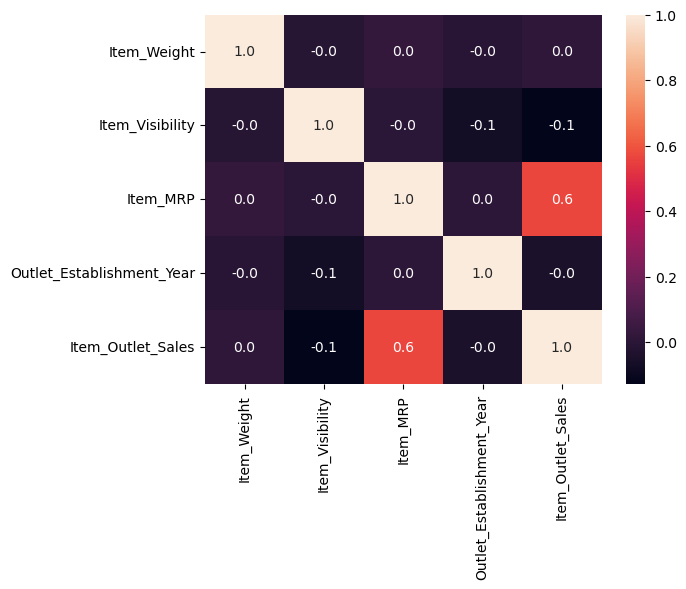

In [23]:
import seaborn as sns 
sns.heatmap(data=df.corr(), annot=True, fmt=".1f")

<AxesSubplot:xlabel='Item_Weight', ylabel='Count'>

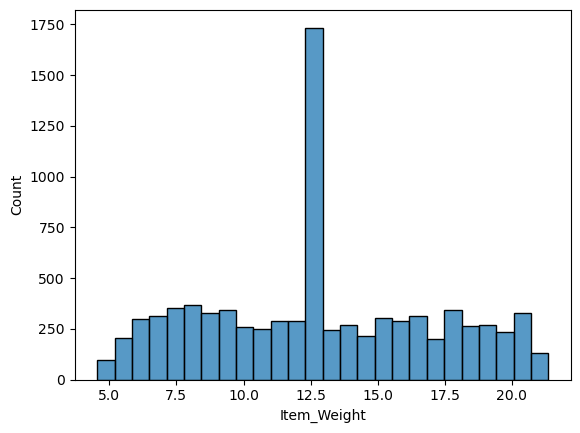

In [25]:
sns.histplot(data=df, x="Item_Weight")

<AxesSubplot:xlabel='Item_Visibility', ylabel='Count'>

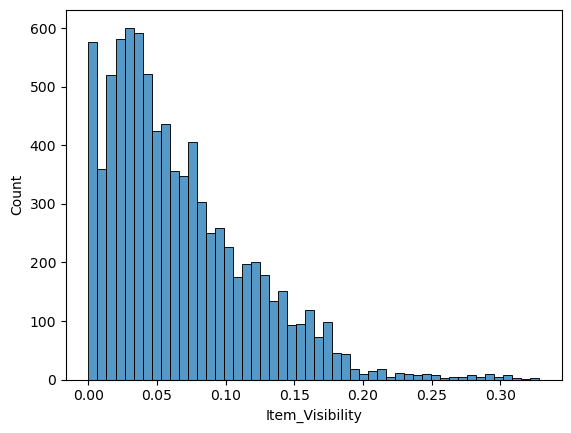

In [26]:
sns.histplot(data=df, x="Item_Visibility")

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

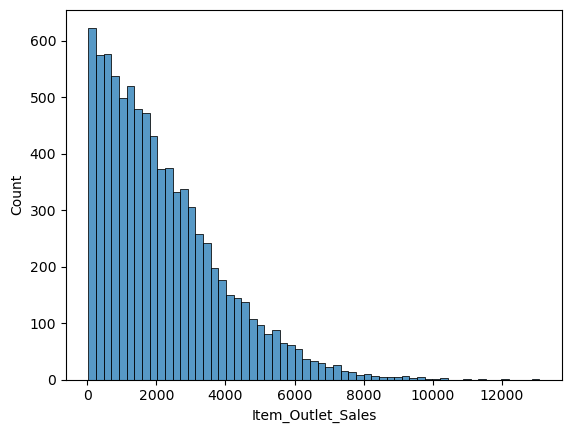

In [28]:
sns.histplot(data=df, x="Item_Outlet_Sales")

In [29]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['Item_Identifier']= label_encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content']= label_encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type']= label_encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier']= label_encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Location_Type']= label_encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']= label_encoder.fit_transform(df['Outlet_Type'])
df['Outlet_Size']= label_encoder.fit_transform(df['Outlet_Size'])


df_test['Item_Identifier']= label_encoder.fit_transform(df_test['Item_Identifier'])
df_test['Item_Fat_Content']= label_encoder.fit_transform(df_test['Item_Fat_Content'])
df_test['Item_Type']= label_encoder.fit_transform(df_test['Item_Type'])
df_test['Outlet_Identifier']= label_encoder.fit_transform(df_test['Outlet_Identifier'])
df_test['Outlet_Location_Type']= label_encoder.fit_transform(df_test['Outlet_Location_Type'])
df_test['Outlet_Type']= label_encoder.fit_transform(df_test['Outlet_Type'])
df_test['Outlet_Size']= label_encoder.fit_transform(df_test['Outlet_Size'])

In [30]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [31]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300,4,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600,1,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315,1,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.860,2,0.118599,4,234.2300,5,1985,1,2,3


In [32]:
df.Item_Visibility = df.Item_Visibility.round(2)
df.Item_MRP = df.Item_MRP.round(2)

df_test.Item_Weight = df_test.Item_Weight.round(2)
df_test.Item_Visibility = df_test.Item_Visibility.round(2)
df_test.Item_MRP = df_test.Item_MRP.round(2)



In [33]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.02,4,249.81,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.02,14,48.27,3,2009,1,2,2,443.4228
2,662,17.50,1,0.02,10,141.62,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.00,6,182.10,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.00,9,53.86,1,1987,0,2,1,994.7052


In [34]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.75,1,0.01,13,107.86,9,1999,1,0,1
1,1067,8.30,4,0.04,4,87.32,2,2007,1,1,1
2,1406,14.60,1,0.10,11,241.75,0,1998,1,2,0
3,809,7.32,1,0.02,13,155.03,2,2007,1,1,1
4,1184,12.86,2,0.12,4,234.23,5,1985,1,2,3


In [35]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [41]:
test=df_test.iloc[:,:]

In [42]:
from sklearn.linear_model import LinearRegression
l1=LinearRegression()
l1.fit(x,y)

LinearRegression()

In [43]:
y_pred=l1.predict(test)

In [44]:
y_pred

array([2098.50460227, 1207.61077266, 2203.05963542, ..., 1856.36065751,
       3189.12156569, 1247.9780036 ])

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'